# Домашнее задание 11

Добро пожаловать на 11 домашнее задание! В нем Вам предлагается пройти полный путь по решению задачи кластеризации: 
* Очистка таблицы от некорректных данных и пропусков

* Выбор оптимальных гипперпараметров для кластеризации

* Кластеризациия с помощью алгоритма DBSCAN

* Анализ кластеров

В данном домашнем задании Вам предлагается посчитать на сколько кластеров можно разбить людей, которые прошли опрос в интернете.
Давайте посмотрим на предложенный набор данных!

In [1]:
import pandas as pd
df = pd.read_csv("dbscan_final_task.csv", index_col = 0)

In [2]:
df

,Пол,Возраст,Вес,Проффесия,Высшее_образование
id,,,,,
0,М,63,83,Сантехник,Да
1,М,63,83,Сантехник,Да
2,Ж,50,81,Тренер по киберспорту,Да
3,Ж,50,73,Тренер по легкой атлетике,Да
4,М,50,73,Крановщик,Да
...,...,...,...,...,...
4928,М,30,63,Data scientist,Да
4929,М,52,86,Крановщик,Да
4930,Ж,19,1406,Таргетолог,Нет


**Возраст** -- Возраст человека

**Пол** -- Пол человека | **м**,  **ж** 

**Вес** -- Вес человека

**Проффесия** -- проффесия человека (20+ различных проффесий)

**Высшее_образование** -- Есть ли у человека высшее образование | **Да**,  **Нет** 

# Задание 1: Очистка таблицы от некорректных данных и пропусков

Удалите из таблицы данные, которые могут содержать:

* промущенные значения null
* вес человека больше 150 кг
* возраст человека больше 100 лет

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933 entries, 0 to 4932
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Пол                 4784 non-null   object
 1   Возраст             4933 non-null   int64 
 2   Вес                 4933 non-null   int64 
 3   Проффесия           4794 non-null   object
 4   Высшее_образование  4933 non-null   object
dtypes: int64(2), object(3)
memory usage: 231.2+ KB


In [6]:
df.describe()

,Возраст,Вес
count,4933.000000,4933.000000
mean,47.343604,110.221974
std,40.393424,237.043535
min,18.000000,40.000000
25%,23.000000,55.000000
50%,30.000000,75.000000
75%,63.000000,87.000000
max,299.000000,1993.000000


In [7]:
df = df.drop(df[df['Пол'].isna()].index)
df = df.drop(df[df['Проффесия'].isna()].index)
df = df.drop(df[df['Высшее_образование'].isna()].index)

In [8]:
df = df.drop(df[df['Возраст']>100].index)
df = df.drop(df[df['Вес']>150].index)

# Задание 2: Замена переменных

Сделайте замену пременных по следующем принципу:

* **Проффесия** : каждую проффессию представить как отдельный столбец таблицы
* **Высшее_образование** : да --> 1, нет --> 0
* **Пол** : м --> 0, ж --> 1

проверьте, что после замены переменных у вас столбцы стали численными.

In [9]:
df['Высшее_образование'] = df['Высшее_образование'].map({'Да' : 1,'Нет' : 0})
df['Пол'] = df['Пол'].map({'Ж' : 1,'М' : 0})

In [10]:
df

,Пол,Возраст,Вес,Проффесия,Высшее_образование
id,,,,,
0,0,63,83,Сантехник,1
1,0,63,83,Сантехник,1
2,1,50,81,Тренер по киберспорту,1
3,1,50,73,Тренер по легкой атлетике,1
4,0,50,73,Крановщик,1
...,...,...,...,...,...
4925,0,71,93,Токарь,1
4926,1,56,97,Тренер по волейболу,1
4927,0,30,63,Data scientist,1


In [11]:
for i in df['Проффесия'].unique():
    df[i] = df['Проффесия'].isin([i]).astype(int)
    
df = df.drop(['Проффесия'], axis=1)

In [12]:
df

,Пол,Возраст,Вес,Высшее_образование,Сантехник,Тренер по киберспорту,Тренер по легкой атлетике,Крановщик,Backend-разработчик,Frontend-разработчик,...,Блогер,SMM-специалист,Тестировщик,Маляр,Таргетолог,Фотограф,Копирайтер,IOS-разработчик,Data scientist,Тренер по фитнесу
id,,,,,,,,,,,,,,,,,,,,,
0,0,63,83,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,63,83,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,50,81,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,50,73,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,50,73,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,71,93,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4926,1,56,97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4927,0,30,63,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Задание 4: Выбор оптимальных гипперпараметров для кластеризации

Найдите наилучшие гипперпараметры для алгоритма DBSCAN, используя метод перебора и метрику силуэт. 
В качестве возможных вариантоов гипперпараметров, используйте следующие варианты:

<code>
eps_array = [0.01, 0.2, 0.6, 1, 2, 5, 10, 20, 100]
min_samples_array = [1, 2, 3, 5, 10, 15, 20, 25, 30, 50]</code>



Попробуйте улучшить текущее решение, используйте MinMax нормализацию для данных кластеризации. Затем найдите наилучшие гипперпараметры для обновленного датасета

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [15]:
X = df

eps_array = [0.01, 0.2, 0.6, 1, 2, 5, 10, 20, 100]
min_samples_array = [1, 2, 3, 5, 10, 15, 20, 25, 30, 50]

best_eps = eps_array[0]
best_min_samples = min_samples_array[0]
best_silhouette_score_without_minmax = -1.0
for eps in eps_array:
    for min_samples in min_samples_array:
        
        clustering = DBSCAN(eps=eps,min_samples=min_samples).fit(X)
        
        df["номер кластера"] = clustering.labels_
        
        if len(df["номер кластера"].unique())<=1:
            continue
        else:
            temp_ss = silhouette_score(X,df["номер кластера"])
            if best_silhouette_score_without_minmax < temp_ss:
                best_silhouette_score_without_minmax = temp_ss
                best_eps = eps
                best_min_samples = min_samples

In [16]:
print(best_silhouette_score_without_minmax,best_min_samples,best_eps)

0.6424661311385792 1 2


In [17]:
X = df.drop(["номер кластера"],axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[X.columns] = scaler.fit_transform(X)

X = df[X.columns]

In [18]:
X

,Пол,Возраст,Вес,Высшее_образование,Сантехник,Тренер по киберспорту,Тренер по легкой атлетике,Крановщик,Backend-разработчик,Frontend-разработчик,...,Блогер,SMM-специалист,Тестировщик,Маляр,Таргетолог,Фотограф,Копирайтер,IOS-разработчик,Data scientist,Тренер по фитнесу
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.725806,0.716667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.725806,0.716667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.516129,0.683333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.516129,0.550000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.516129,0.550000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0.0,0.854839,0.883333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4926,1.0,0.612903,0.950000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4927,0.0,0.193548,0.383333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
eps_array = [0.01, 0.2, 0.6, 1, 2, 4]
# до 4 тк макс расстояние между точками в 20мерном пространстве = корень 20 (что между 4 и 5)
min_samples_array = [1, 2, 3, 5, 10, 15, 20, 25, 30, 50]

best_eps = eps_array[0]
best_min_samples = min_samples_array[0]
best_silhouette_score_without_minmax = -1.0
for eps in eps_array:
    for min_samples in min_samples_array:
        
        clustering = DBSCAN(eps=eps,min_samples=min_samples).fit(X)
        
        df["номер кластера"] = clustering.labels_
        
        if len(df["номер кластера"].unique())<=1:
            continue
        else:
            temp_ss = silhouette_score(X,df["номер кластера"])
            if best_silhouette_score_without_minmax < temp_ss:
                best_silhouette_score_without_minmax = temp_ss
                best_eps = eps
                best_min_samples = min_samples

In [20]:
print(best_silhouette_score_without_minmax, best_min_samples, best_eps)

0.7877072028996124 1 0.2


In [21]:
clustering = DBSCAN(eps=best_eps,min_samples=best_min_samples).fit(X)
df["cluster"] = clustering.labels_

In [22]:
df['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

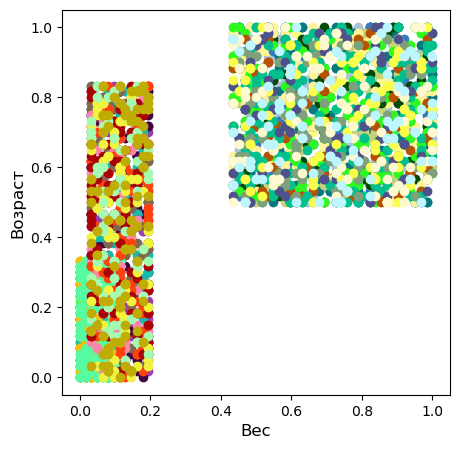

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

plt.figure(figsize=(5,5))


for i in df['cluster'].unique():
    plt.scatter('Высшее_образование','Вес', data=df[df["cluster"]==i],color=colors_list[i*10])
plt.ylabel('Возраст',fontsize=12)
plt.xlabel('Вес',fontsize=12)
plt.show()

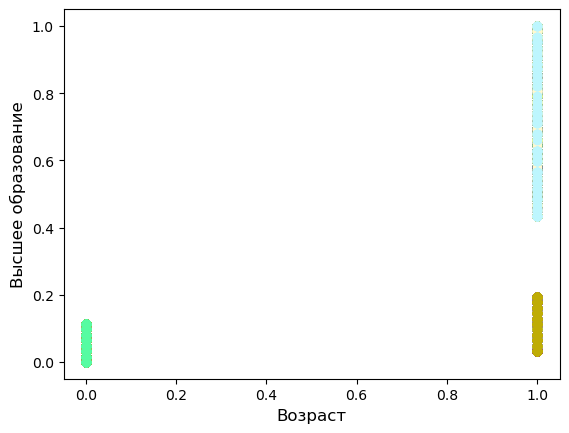

In [26]:
for i in df['cluster'].unique():
    plt.scatter('Высшее_образование','Возраст', data=df[df["cluster"]==i],color=colors_list[i*10])
    
plt.ylabel('Высшее образование',fontsize=12)
plt.xlabel('Возраст',fontsize=12)
plt.show()

# Задание 5: Сохраните результаты

В переменную <code>best_silhouette_score</code> сохраните наилучшую метрику силуэта, которая у Вас получилась в ходе экспериментов.

Переменную <code>minmax</code> сделайте равной <code>True</code>, если <code>best_silhouette_score</code> был получен с использованием MinMax нормализации. Иначе сделайте ее равной <code>False</code>

In [27]:
best_silhouette_score = best_silhouette_score_without_minmax #забыл переименовать, жто с минмаксом
minmax = True

# Задание 5: Анализ кластеров

Проведите собственный анализ кластеров, попробуйте понять какие люди находяться в каждом кластере

In [28]:
df_rezults = pd.DataFrame([
                    [best_silhouette_score, minmax],
                    ],
                   columns=["best_silhouette_score", "minmax"], index=["DBSCAN"])

In [29]:
df_rezults.to_csv("h11_rezults.csv")

И так, поздравляем, Вы выполнили 11 домашнее задание!

Теперь осталось чуть-чуть...

На платформу Школково Вам нужно будет загрузить таблицу.

Чтобы сделать это, выполните ячейку выше. Тем самым Вы получите нужную таблицу. Загрузите ее на платформу Школково.